# Исследовательский анализ данных (Exploratory data analysis = EDA)

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn scipy -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import scipy
from scipy import stats

scipy.__version__

'1.6.2'

In [6]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [7]:
import seaborn as sns

sns.__version__

'0.11.1'

## Загрузка данных

[Источник (FuelConsumption)](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

In [8]:
df = pd.read_csv("./../../data/FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


## Анализ данных и преобразование типов

### Анализ типов

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [10]:
df.MODELYEAR.value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

In [11]:
for col_name in df.select_dtypes(exclude=np.number):
    nunique = df[col_name].nunique()
    print(f"column: {col_name}\tunique: {nunique}")

column: MAKE	unique: 39
column: MODEL	unique: 663
column: VEHICLECLASS	unique: 16
column: TRANSMISSION	unique: 22
column: FUELTYPE	unique: 4


In [12]:
# преобразовать в правильные типы
df.MODEL = df.MODEL.astype("string")

for col_name in df.select_dtypes(include="object"):
    df[col_name] = df[col_name].astype("category")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   MODELYEAR                 1067 non-null   int64   
 1   MAKE                      1067 non-null   category
 2   MODEL                     1067 non-null   string  
 3   VEHICLECLASS              1067 non-null   category
 4   ENGINESIZE                1067 non-null   float64 
 5   CYLINDERS                 1067 non-null   int64   
 6   TRANSMISSION              1067 non-null   category
 7   FUELTYPE                  1067 non-null   category
 8   FUELCONSUMPTION_CITY      1067 non-null   float64 
 9   FUELCONSUMPTION_HWY       1067 non-null   float64 
 10  FUELCONSUMPTION_COMB      1067 non-null   float64 
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64   
 12  CO2EMISSIONS              1067 non-null   int64   
dtypes: category(4), float64(4), int64(4), string(1)


In [14]:
# бессмысленная колонка - всегда одно значение
del df["MODELYEAR"]

## Анализ числовых признаков

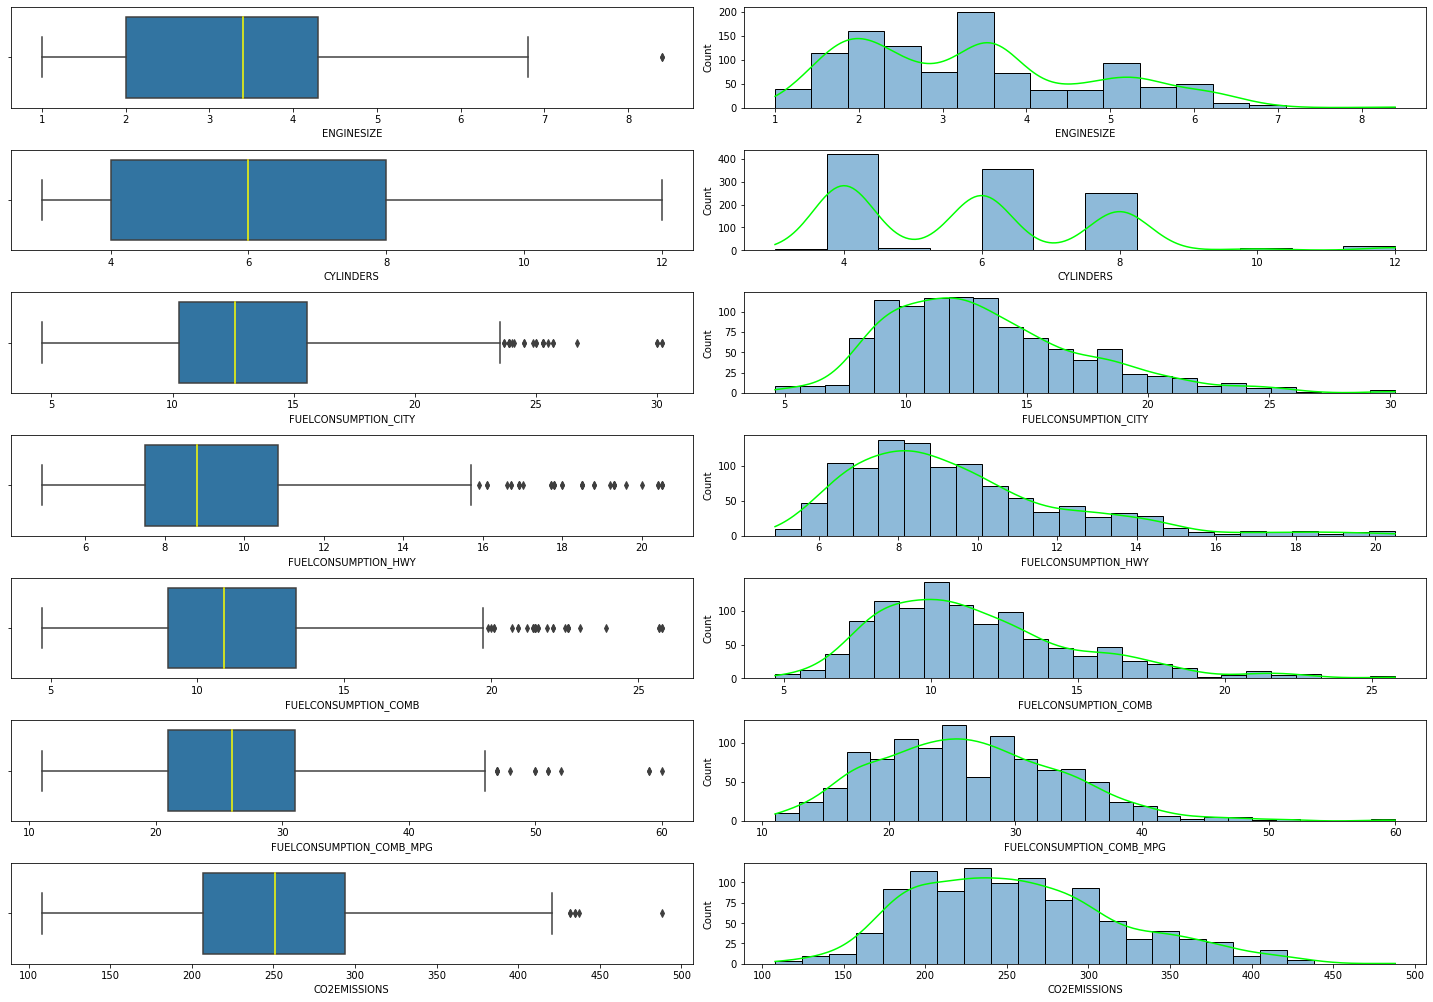

In [15]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
fig, axs = plt.subplots(len(num_cols), 2, figsize=(20, 2 * len(num_cols)))

for index, column_name in enumerate(num_cols):
    sns.boxplot(x=df[column_name], ax=axs[index][0])
    axs[index][0].get_lines()[4].set_color("yellow")

    sns.histplot(x=df[column_name], kde=True, ax=axs[index][1])
    axs[index][1].get_lines()[0].set_color("lime")

fig.tight_layout(pad=1.0)

Выводы:
- Колонки `ENGINESIZE` и `CYLINDERS` - это порядковая шкала, то есть тоже "категориальная".
- Имеются выбросы. Нужно будет что-то предпринять по этому поводу.
- Остальные числовые признаки распределены почти нормально, но точно требуют нормализации. Со стандартизацией можно поэкспериментировать.

### Анализ корреляций

In [16]:
# функция, которая вычисляет коэффициент корреляции и
# добавляет его в качестве "аннотации"
def corr(x, y, cor_name="pearson", **kwargs):
    if cor_name == "pearson":
        prefix = "p="
        r, _ = stats.pearsonr(x, y)
        cmap = plt.get_cmap("PuOr")
        xy = (0.1, 0.9)

    elif cor_name == "spearman":
        prefix = "s="
        r, _ = stats.spearmanr(x, y)
        cmap = plt.get_cmap("seismic")
        xy = (0.5, 0.1)

    ax = plt.gca()
    ax.annotate(
        text="{}{:.2f}".format(prefix, r),
        xy=xy,
        xycoords=ax.transAxes,
        size=20,
        color=cmap(r),
    )

In [17]:
def all_in_one_plot():
    g = sns.PairGrid(df)

    g.map_upper(sns.scatterplot, color="m")
    g.map_upper(corr, cor_name="spearman")

    g.map_diag(sns.histplot, color="blue", kde=True)
    g.map_diag(sns.rugplot, color="green", height=0.08)

    g.map_lower(sns.kdeplot, color="c")
    g.map_lower(corr, cor_name="pearson")

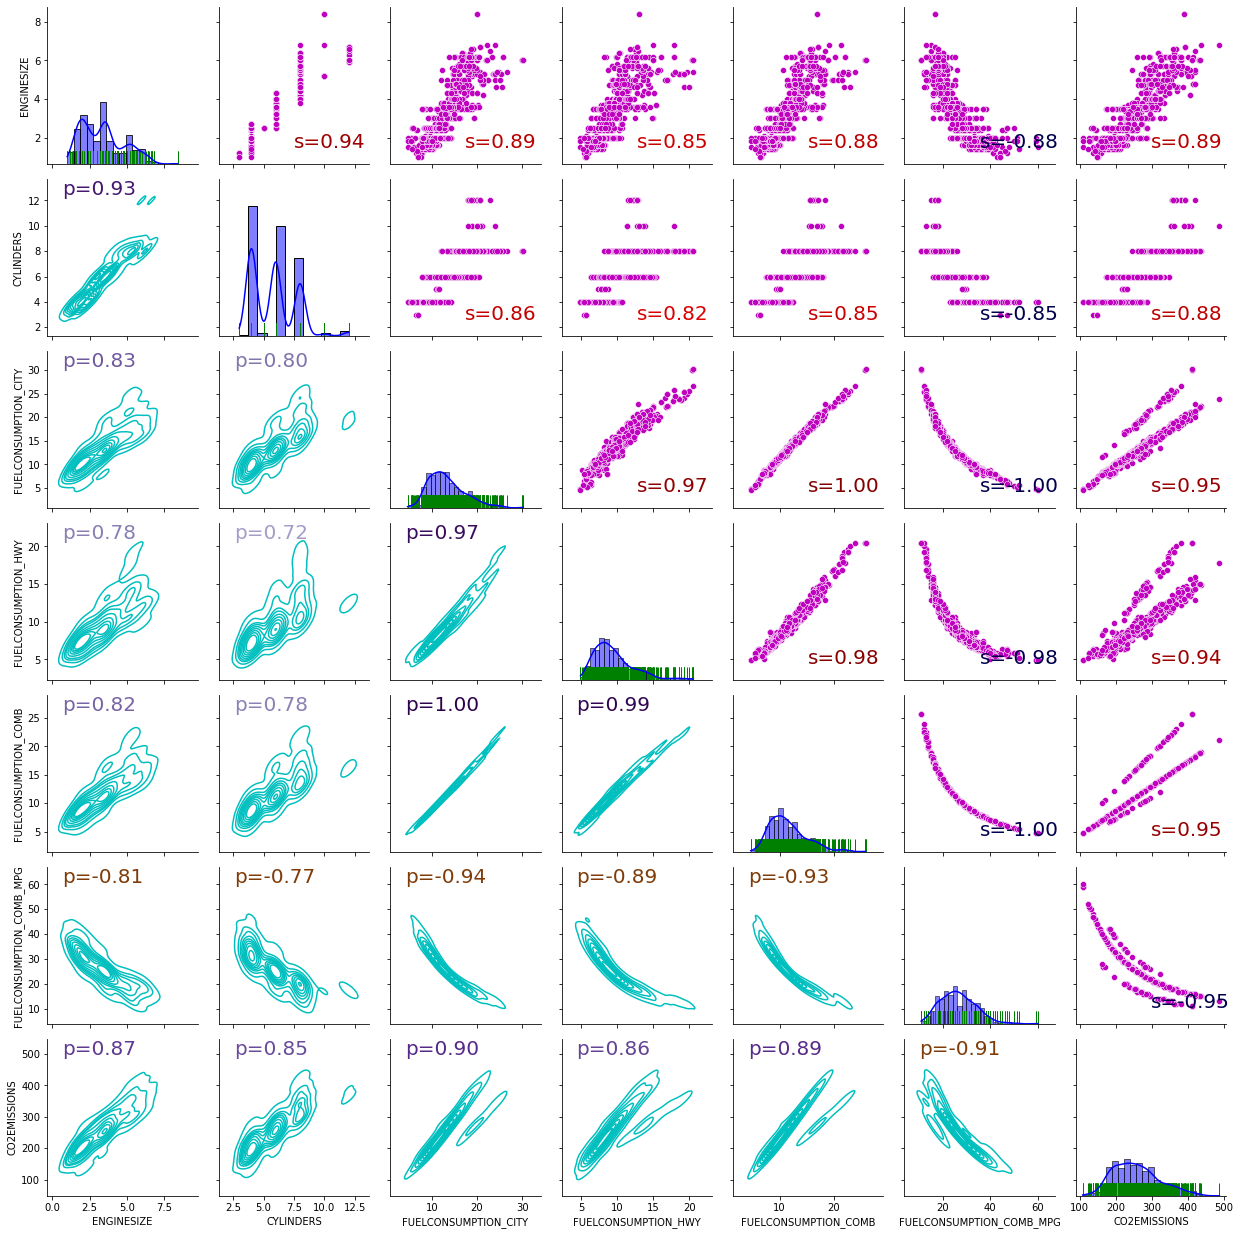

In [18]:
all_in_one_plot()

Выводы:
- Во многих признаках сильная корреляция. 
- Подозрительно выглядит корреляция равна 1. 
- Такая ситуация требует дополнительного исследования последствий.

## Анализ категориальных признаков

In [19]:
df.ENGINESIZE = df.ENGINESIZE.astype(pd.CategoricalDtype(ordered=True))
df.CYLINDERS = df.CYLINDERS.astype(pd.CategoricalDtype(ordered=True))

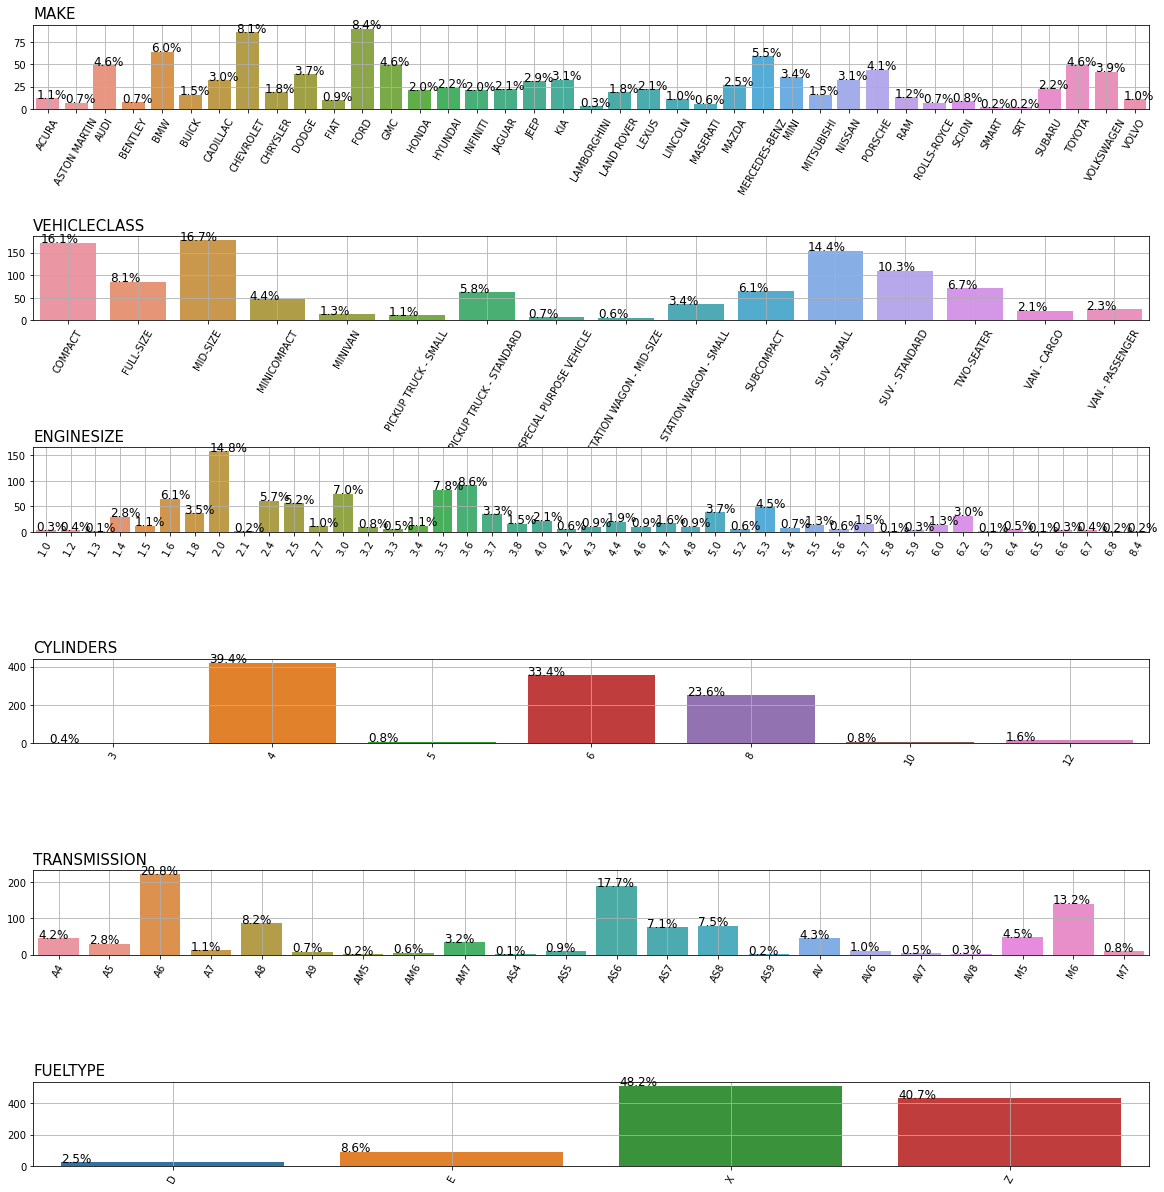

In [20]:
# распределение значений в НЕ числовых признаках
cat_cols = df.select_dtypes(include="category").columns.to_list()
fig, axs = plt.subplots(len(cat_cols), 1, figsize=(20, 3.5 * len(cat_cols)))
for index, col_name in enumerate(cat_cols):
    ax = axs[index]

    g = sns.countplot(x=df[col_name], ax=ax)
    g.set_xticklabels(g.get_xticklabels(), rotation=60)

    # отключить подпись оси x и y
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)

    # включить сетку на графике
    ax.grid()

    # сколько всего записей для всех категорий в колонке
    total = len(df[col_name])

    # для каждого столбца на графике сверху добавить процент
    for p in ax.patches:
        # вычислить процент, который соответствует текущему столбцу
        percentage = "{:.1f}%".format(100 * p.get_height() / total)

        # начало (слева) столбца на графике по оси x
        x_pos = p.get_x()

        # верх столбца на графике по оси x
        y_pos = p.get_y() + p.get_height()

        # добавить процент в качестве аннотации к столбцу
        ax.annotate(percentage, xy=(x_pos, y_pos), fontsize=12)

        # наименование графика справа цветом графика
        ax.set_title(col_name, loc="left", fontsize=15)

    # расстояние между графиками по горизонтали и вертикали
    fig.subplots_adjust(hspace=1.5)

<AxesSubplot:xlabel='TRANSMISSION', ylabel='CO2EMISSIONS'>

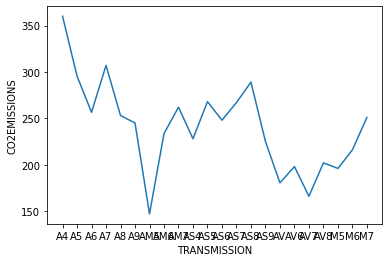

In [21]:
sns.lineplot(data=df.groupby(by=["TRANSMISSION"]).CO2EMISSIONS.aggregate("median"))

In [22]:
df.groupby(by=["FUELTYPE"]).CO2EMISSIONS.aggregate("median")

FUELTYPE
D    224
E    285
X    230
Z    259
Name: CO2EMISSIONS, dtype: int64

In [23]:
df.CYLINDERS.value_counts()

4     420
6     356
8     252
12     17
5       9
10      9
3       4
Name: CYLINDERS, dtype: int64

In [24]:
df.groupby(by=["CYLINDERS"]).CO2EMISSIONS.aggregate("median")

CYLINDERS
3     147.0
4     199.0
5     223.0
6     260.0
8     325.5
10    389.0
12    368.0
Name: CO2EMISSIONS, dtype: float64

/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

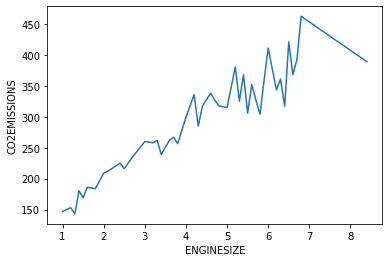

In [25]:
sns.lineplot(data=df.groupby(by=["ENGINESIZE"]).CO2EMISSIONS.aggregate("median"))

Выводы:
- Много категорий, которые представлены малым количеством записей.
- Если бы это была реальная задача, то нужно было бы что-то с этим делать. Хорошее решение: объединить некоторые категории в одну (требуется разбираться в предметной области).
- Допустим, что категориальные признаки имеют следующие шкалы (см. [лекцию](../../03_data_analysis/lectures/08_scale_types.ipynb))
:
    - `FUELTYPE` - номинальная
    - `TRANSMISSION` - номинальная
    - `MAKE` - номинальная
    - `CYLINDERS` - порядковая
    - `ENGINESIZE` - порядковая

## Анализ отсутствующих значений

In [26]:
df.isna().sum()

MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

Выводы: Отсутствующих значений нет.